In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

features = pd.read_csv("C:/Users/TFG155/Desktop/인공지능개론/기말고사 데이터/501.csv", index_col = None, header = 0)
features

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,42:03.8,-0.999023,-0.063477,0.140625,-0.980469,-0.112061,-0.048096,6
1,42:03.9,-0.980225,-0.079346,0.140625,-0.961182,-0.121582,-0.051758,6
2,42:03.9,-0.950195,-0.076416,0.140625,-0.949463,-0.080566,-0.067139,6
3,42:03.9,-0.954834,-0.059082,0.140381,-0.957520,-0.046143,-0.050781,6
4,42:03.9,-0.972412,-0.042969,0.142822,-0.977051,-0.023682,-0.026611,6
...,...,...,...,...,...,...,...,...
103855,17:06.0,-0.760010,-0.068848,-0.203125,-0.796875,-0.007812,-0.036865,6
103856,17:06.0,-0.736328,-0.068115,-0.203125,-0.769287,0.037354,-0.056641,6
103857,17:06.0,-0.736328,-0.079834,-0.203125,-0.763672,0.052490,-0.027588,6
103858,17:06.0,-0.762207,-0.078125,-0.205078,-0.763428,0.042236,0.022705,6


In [2]:
features.isnull().sum()

timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64

Text(0.5, 1.0, 'Label')

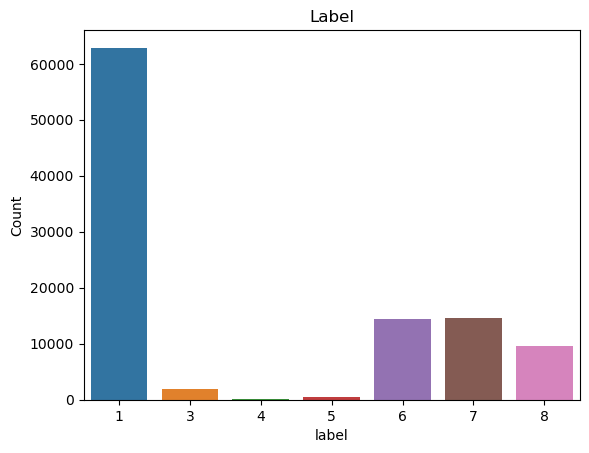

In [3]:
sns.countplot(x = features['label'])
plt.xlabel("label")
plt.ylabel("Count")
plt.title("Label")

In [4]:
X = features.iloc[:,1:7].values
y = features.iloc[:,7].values

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
X_train,X_test, y_train,y_test = train_test_split(X_test,y_test,test_size=0.2,random_state=0) 

In [6]:
X, Y, Y.shape

(array([[-0.999023, -0.063477,  0.140625, -0.980469, -0.112061, -0.048096],
        [-0.980225, -0.079346,  0.140625, -0.961182, -0.121582, -0.051758],
        [-0.950195, -0.076416,  0.140625, -0.949463, -0.080566, -0.067139],
        ...,
        [-0.736328, -0.079834, -0.203125, -0.763672,  0.05249 , -0.027588],
        [-0.762207, -0.078125, -0.205078, -0.763428,  0.042236,  0.022705],
        [-0.799805, -0.078125, -0.196533, -0.770264,  0.013428,  0.081543]]),
 array([[0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 1, 0, 0]], dtype=uint8),
 (103860, 7))

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(100,input_shape=(6,),activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(60,activation='relu'))
model.add(Dense(7,activation='softmax'))

model.compile(Adam(lr=0.04),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               700       
                                                                 
 dense_1 (Dense)             (None, 80)                8080      
                                                                 
 dense_2 (Dense)             (None, 60)                4860      
                                                                 
 dense_3 (Dense)             (None, 7)                 427       
                                                                 
Total params: 14,067
Trainable params: 14,067
Non-trainable params: 0
_________________________________________________________________


c:\Users\TFG155\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [8]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
520/520 [==============================] - 2s 3ms/step - loss: 0.0730 - accuracy: 0.9164 - val_loss: 0.0558 - val_accuracy: 0.9374
Epoch 2/100
520/520 [==============================] - 1s 2ms/step - loss: 0.0564 - accuracy: 0.9410 - val_loss: 0.0450 - val_accuracy: 0.9509
Epoch 3/100
520/520 [==============================] - 1s 2ms/step - loss: 0.0497 - accuracy: 0.9471 - val_loss: 0.0491 - val_accuracy: 0.9439
Epoch 4/100
520/520 [==============================] - 1s 2ms/step - loss: 0.0498 - accuracy: 0.9475 - val_loss: 0.0446 - val_accuracy: 0.9507
Epoch 5/100
520/520 [==============================] - 1s 2ms/step - loss: 0.0480 - accuracy: 0.9494 - val_loss: 0.0490 - val_accuracy: 0.9531
Epoch 6/100
520/520 [==============================] - 1s 2ms/step - loss: 0.0468 - accuracy: 0.9501 - val_loss: 0.0437 - val_accuracy: 0.9499
Epoch 7/100
520/520 [==============================] - 1s 2ms/step - loss: 0.0459 - accuracy: 0.9487 - val_loss: 0.0416 - val_accuracy: 0.9567

In [9]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2552
           1       0.00      0.00      0.00        74
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        18
           4       0.93      0.92      0.93       584
           5       0.99      1.00      1.00       561
           6       1.00      1.00      1.00       361

    accuracy                           0.96      4155
   macro avg       0.55      0.56      0.56      4155
weighted avg       0.93      0.96      0.95      4155

[[2514    0    0    0   33    5    0]
 [  67    0    0    0    7    0    0]
 [   5    0    0    0    0    0    0]
 [  18    0    0    0    0    0    0]
 [  46    0    0    0  538    0    0]
 [   0    0    0    0    0  561    0]
 [   0    0    0    0    0    0  361]]


c:\Users\TFG155\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\TFG155\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\TFG155\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


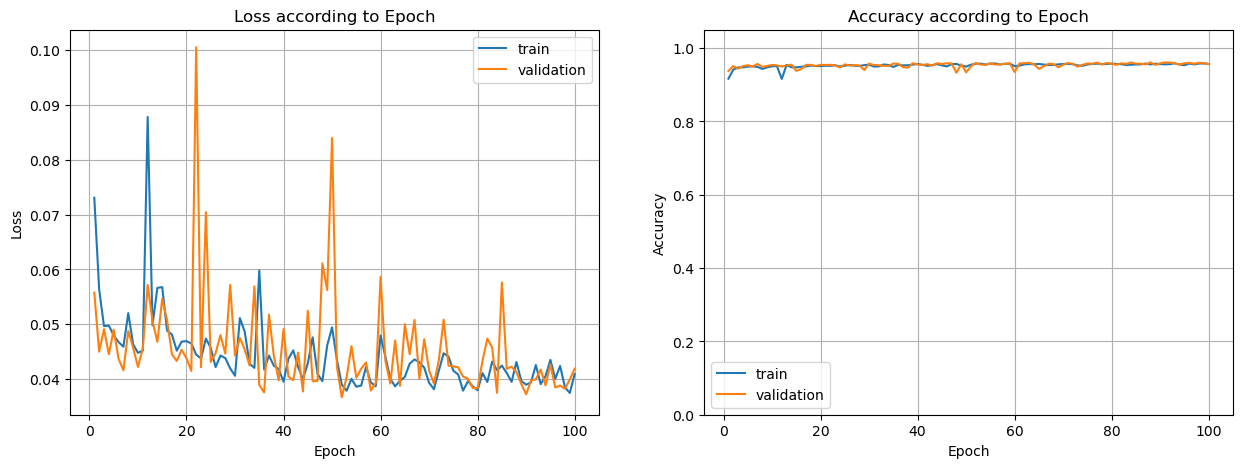

In [10]:
import pandas as pd

df_hist = pd.DataFrame(model_history.history)
df_hist['epoch'] = range(1, 101)

plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.title('Loss according to Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(df_hist['epoch'], df_hist['loss'], label='train')
plt.plot(df_hist['epoch'], df_hist['val_loss'], label = 'validation')
# plt.ylim([0, 1.5])
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.title('Accuracy according to Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(df_hist['epoch'], df_hist['accuracy'], label='train')
plt.plot(df_hist['epoch'], df_hist['val_accuracy'], label='validation')
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()

plt.show()